<a href="https://colab.research.google.com/github/TreyPitman/IMSE541Homework/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt

In [ ]:
data1 = pd.read_csv('https://raw.githubusercontent.com/TreyPitman/IMSE541Homework/main/flowrate.csv', sep=',', na_values=".")
data1

,Obs,Flow,Uniform
0,1,125,2.7
1,2,125,2.6
2,3,125,4.6
3,4,125,3.2
4,5,125,3.0
5,6,125,3.8
6,1,160,4.6
7,2,160,4.9
8,3,160,5.0
9,4,160,4.2


In [ ]:
Flow125=data1[data1['Flow']==125]['Uniform']
Flow160=data1[data1['Flow']==160]['Uniform']
Flow200=data1[data1['Flow']==200]['Uniform']

In [ ]:
stat, p=f_oneway(Flow125,  Flow160,  Flow200)
print('stat=%.5f, p=%.5f' %(stat,p))

stat=3.58563, p=0.05337


In [ ]:
data1b = [Flow125, Flow160, Flow200]

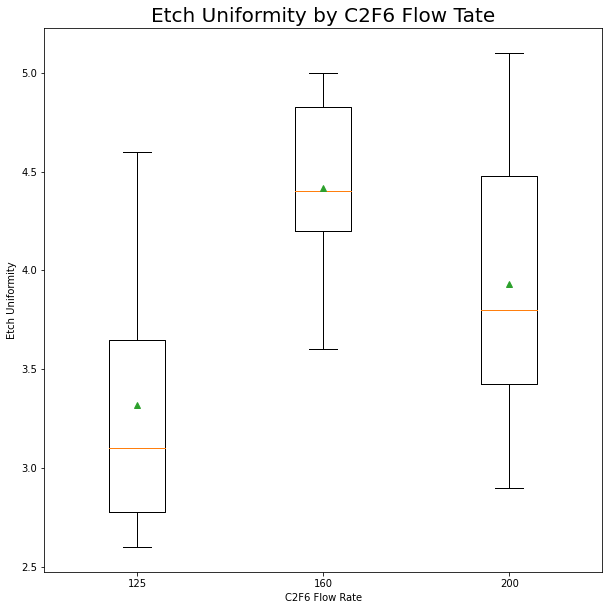

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Etch Uniformity by C2F6 Flow Tate", fontsize= 20)
ax.set
ax.boxplot(data1b,labels= ['125', '160', '200'],showmeans= True)
plt.xlabel("C2F6 Flow Rate")
plt.ylabel("Etch Uniformity")

plt.show()

In [ ]:
model = ols('Uniform ~ C(Flow)', data=data1).fit()

In [ ]:
uniform_predict=model.predict()
uniform_predict

array([3.31666667, 3.31666667, 3.31666667, 3.31666667, 3.31666667,
       3.31666667, 4.41666667, 4.41666667, 4.41666667, 4.41666667,
       4.41666667, 4.41666667, 3.93333333, 3.93333333, 3.93333333,
       3.93333333, 3.93333333, 3.93333333])

In [ ]:
residuals=model.resid
residuals

0    -0.616667
1    -0.716667
2     1.283333
3    -0.116667
4    -0.316667
5     0.483333
6     0.183333
7     0.483333
8     0.583333
9    -0.216667
10   -0.816667
11   -0.216667
12    0.666667
13   -1.033333
14   -0.533333
15   -0.433333
16    0.166667
17    1.166667
dtype: float64

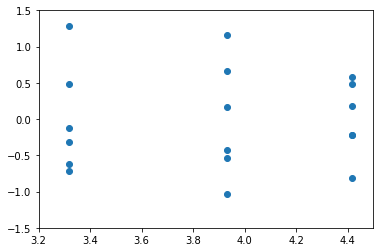

In [ ]:
plt.scatter(uniform_predict, residuals)
plt.axis([3.2, 4.5, -1.5, 1.5])
plt.show()

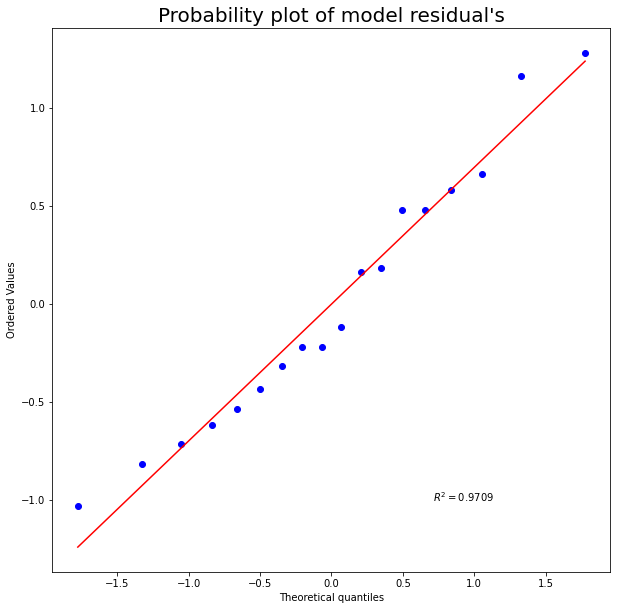

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [ ]:
p = scipy.stats.norm.sf(abs(4.171))*2 
'{:f}'.format(p)

'0.000030'

In [19]:
data2 = pd.read_csv('https://raw.githubusercontent.com/TreyPitman/IMSE541Homework/main/enginedata.csv', sep=',', na_values=".")
data2

,hp,rpm,octane,comp
0,225,2000,90,100
1,212,1800,94,95
2,229,2400,88,110
3,222,1900,91,96
4,219,1600,86,100
5,278,2500,96,110
6,246,3000,94,98
7,237,3200,90,100
8,233,2800,88,105
9,224,3400,86,97


In [21]:
model2 = ols('hp ~ rpm + octane + comp', data2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     hp   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Thu, 22 Sep 2022   Prob (F-statistic):            0.00317
Time:                        21:18:59   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -266.0312     92.674     -2.871      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [24]:
stats.t.isf(.025,8)

2.306004135033371